In [29]:
import pandas as pd   
import numpy as np
pd.set_option('display.max_rows',500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

 - Highly linked to the Data Understanding Phase
 - Focus is always to understand the final data structure
 - Support each step by visual analytics

In [30]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
#John Hopkins Data located in a pre-defined folder and we retrieve the data by read csv command
pd_raw = pd.read_csv(data_path)

In [31]:
pd_raw.head() #Looking at few rows of the dataset to see how is it how is it structured

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981


In [32]:
#Date is a primary key togeather with Country/Region and Province/State
#Pandas require to specify the date as a date type.
#Stripping down the column to a new data structure.
pd_raw.columns[:] #Getting the columns of DataFrame which are represented as an index.

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/29/20', '8/30/20', '8/31/20', '9/1/20', '9/2/20', '9/3/20', '9/4/20',
       '9/5/20', '9/6/20', '9/7/20'],
      dtype='object', length=234)

In [33]:
time_idx=pd_raw.columns[4:]    
#Starting from the fourth column we cut out the dataset.

In [34]:
df_plot = pd.DataFrame({'date':time_idx})
#Bringing the date information into a new vector and add it as a column to our dataframe

In [35]:
df_plot.head() #We can see now clear column with dates from which we can slice out dates later

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [36]:
len(pd_raw['Country/Region'].unique())
#We will see which countries are in our data set and cut them out

188

In [37]:
pd_raw[pd_raw['Country/Region']=='US'].iloc[:,4::].sum(axis=0)[0:4]
#Defining a dataframe which has a country as a column name.

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
dtype: int64

In [38]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South' ,
             ]

In [39]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))
    #We push each country from the list to a df plot.So that each country gets a new column.
    #np.array is because we have to push an array to the dataframe.

In [40]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


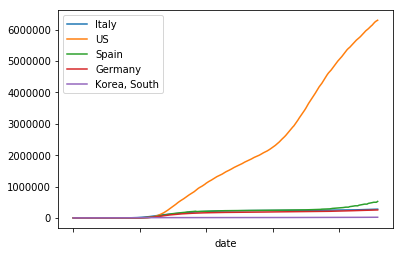

In [41]:
%matplotlib inline 
#To plot inside a ipython notebook we use this magic command
df_plot.set_index('date').plot()
#Setting the date to index and setting the first result

# Data Type Date

In [42]:
df_plot

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3
5,1/27/20,0,5,0,1,4
6,1/28/20,0,5,0,4,4
7,1/29/20,0,5,0,4,4
8,1/30/20,0,5,0,4,4
9,1/31/20,2,7,0,5,11


In [43]:
type(df_plot.date[0])
#getting to know the type of the element

str

In [44]:
df_plot.head()
#Date is in US format and not in standard format

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [45]:
from datetime import datetime
#Using the date time library

In [46]:
df_plot.date[0]
#Converting the string into a date time object in all dimensions

'1/22/20'

In [47]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")
#strptime converts a string to a date object and we have to specify how it is defined our sting has first month then date and then year and we get the date tie object

datetime.datetime(2020, 1, 22, 0, 0)

In [48]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
#Constructing a time index by looping over a date and push it directly to a time index.That is we have a vector of individuall date time object.
time_idx[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [49]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)
#We can bring back the date time object back to string
time_str[0:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [50]:
df_plot['date']=time_idx
#Pushing the time index into the date column
type(df_plot['date'][0])
#We can look at the identified type

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [52]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
#moving the data model to a processed file location

# Relational data model - defining a primary key
In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table)

A primary key’s main features are:

 - It must contain a unique value for each row of data.
 - It cannot contain null values.

In [69]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head(25)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,94,94,94,94,94,95,95,95,95,95
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,4040,4050,4063,4079,4091,4099,4104,4114,4118,4126


In [70]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('na')  #ensure a sring, important for indexing

In [71]:
pd_data_base=pd_data_base.drop(['Lat','Long','state'],axis=1) #Run only once.

#type(pd_data_base.T.stack(level=[0]))

#pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
#pd_data_base.head()
#pd_data_base = pd_data_base.reset_index().columns
#type(pd_data_base)
pd_data_base.head(100)

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494
1,Albania,0,0,0,0,0,0,0,0,0,...,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406
2,Algeria,0,0,0,0,0,0,0,0,0,...,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653
3,Andorra,0,0,0,0,0,0,0,0,0,...,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261
4,Angola,0,0,0,0,0,0,0,0,0,...,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,94,94,94,94,94,95,95,95,95,95
6,Argentina,0,0,0,0,0,0,0,0,0,...,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007
7,Armenia,0,0,0,0,0,0,0,0,0,...,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845
8,Australia,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,Australia,0,0,0,0,3,4,4,4,4,...,4040,4050,4063,4079,4091,4099,4104,4114,4118,4126


In [72]:
pd_data_base = pd_data_base.set_index('country').groupby('country').sum()

In [73]:
pd_data_base.head(188)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494
Albania,0,0,0,0,0,0,0,0,0,0,...,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406
Algeria,0,0,0,0,0,0,0,0,0,0,...,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653
Andorra,0,0,0,0,0,0,0,0,0,0,...,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261
Angola,0,0,0,0,0,0,0,0,0,0,...,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,94,94,94,94,94,95,95,95,95,95
Argentina,0,0,0,0,0,0,0,0,0,0,...,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007
Armenia,0,0,0,0,0,0,0,0,0,0,...,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845
Australia,0,0,0,0,4,5,5,6,9,9,...,25670,25746,25819,25923,26049,26136,26207,26278,26321,26373


In [74]:
pd_data_base = pd_data_base.T.stack(level=[0])

In [75]:
pd_data_base = pd_data_base.reset_index().rename(columns={0:'confirmed', 'level_0' : 'date'})

In [76]:
pd_data_base.head(188)

,date,country,confirmed
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
5,1/22/20,Antigua and Barbuda,0
6,1/22/20,Argentina,0
7,1/22/20,Armenia,0
8,1/22/20,Australia,0
9,1/22/20,Austria,0


In [77]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in pd_data_base.date]
time_idx[0:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0)]

In [78]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)
#We can bring back the date time object back to string
time_str[0:5]

['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22']

In [79]:
pd_data_base['date']=time_idx
#Pushing the time index into the date column
pd_data_base.date

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
5       2020-01-22
6       2020-01-22
7       2020-01-22
8       2020-01-22
9       2020-01-22
10      2020-01-22
11      2020-01-22
12      2020-01-22
13      2020-01-22
14      2020-01-22
15      2020-01-22
16      2020-01-22
17      2020-01-22
18      2020-01-22
19      2020-01-22
20      2020-01-22
21      2020-01-22
22      2020-01-22
23      2020-01-22
24      2020-01-22
25      2020-01-22
26      2020-01-22
27      2020-01-22
28      2020-01-22
29      2020-01-22
30      2020-01-22
31      2020-01-22
32      2020-01-22
33      2020-01-22
34      2020-01-22
35      2020-01-22
36      2020-01-22
37      2020-01-22
38      2020-01-22
39      2020-01-22
40      2020-01-22
41      2020-01-22
42      2020-01-22
43      2020-01-22
44      2020-01-22
45      2020-01-22
46      2020-01-22
47      2020-01-22
48      2020-01-22
49      2020-01-22
50      2020-01-22
51      2020-01-22
52      2020

In [80]:
#type(df_plot['date'][0])
#We can look at the identified type

In [81]:
pd_data_base.head(190)

,date,country,confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Angola,0
5,2020-01-22,Antigua and Barbuda,0
6,2020-01-22,Argentina,0
7,2020-01-22,Armenia,0
8,2020-01-22,Australia,0
9,2020-01-22,Austria,0


In [82]:
#pd_relational_model['confirmed'][pd_relational_model['country'] == 'US']

In [83]:
#pd_relational_model['country'] == 'US'

In [84]:
pd_data_base.dtypes

date         datetime64[ns]
country              object
confirmed             int64
dtype: object

In [85]:
#pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')
#pd_relational_model.date=[each.strptime('%Y-%m-%d') for each in pd_relational_model.date]

In [86]:
pd_data_base.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [ ]:
#Dont run from below

In [504]:
list(pd_relational_model)
#df["fruit"].tolist()
country_list =  pd_relational_model["country"].unique().tolist()
len(country_list)

188

In [416]:
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [417]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

KeyError: 'state'

In [127]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [128]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [129]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [118]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [130]:
pd_relational_model=pd_relational_model.drop(['state'],axis=1)

In [137]:
pd_relational_model.head()

,date,country,confirmed
0,2020-01-22,Canada,0.0
1,2020-01-22,United Kingdom,0.0
2,2020-01-22,China,1.0
3,2020-01-22,Netherlands,0.0
4,2020-01-22,Australia,0.0


In [138]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [139]:
pd_relational_model.head()

,date,country,confirmed
0,2020-01-22,Canada,0
1,2020-01-22,United Kingdom,0
2,2020-01-22,China,1
3,2020-01-22,Netherlands,0
4,2020-01-22,Australia,0


In [140]:
print(pd_relational_model)

            date                           country  confirmed
0     2020-01-22                            Canada          0
1     2020-01-22                    United Kingdom          0
2     2020-01-22                             China          1
3     2020-01-22                       Netherlands          0
4     2020-01-22                         Australia          0
5     2020-01-22                             China         14
6     2020-01-22                    United Kingdom          0
7     2020-01-22                       Netherlands          0
8     2020-01-22                            Canada          0
9     2020-01-22                    United Kingdom          0
10    2020-01-22                    United Kingdom          0
11    2020-01-22                    United Kingdom          0
12    2020-01-22                             China          6
13    2020-01-22                       Netherlands          0
14    2020-01-22                            Canada          0
15    20

In [253]:
print(pd_relational_model[pd_relational_model['country']=='Australia'])

          date                         state    country  confirmed
4      1/22/20  Australian Capital Territory  Australia        0.0
48     1/22/20               New South Wales  Australia        0.0
51     1/22/20            Northern Territory  Australia        0.0
58     1/22/20                    Queensland  Australia        0.0
69     1/22/20               South Australia  Australia        0.0
71     1/22/20                      Tasmania  Australia        0.0
75     1/22/20                      Victoria  Australia        0.0
76     1/22/20             Western Australia  Australia        0.0
270    1/23/20  Australian Capital Territory  Australia        0.0
314    1/23/20               New South Wales  Australia        0.0
317    1/23/20            Northern Territory  Australia        0.0
324    1/23/20                    Queensland  Australia        0.0
335    1/23/20               South Australia  Australia        0.0
337    1/23/20                      Tasmania  Australia       

In [254]:
test = pd_relational_model[pd_relational_model['country']=='Australia'].reset_index().groupby(['date'])

In [255]:
test.head(20)

,index,date,state,country,confirmed
0,4,1/22/20,Australian Capital Territory,Australia,0.0
1,48,1/22/20,New South Wales,Australia,0.0
2,51,1/22/20,Northern Territory,Australia,0.0
3,58,1/22/20,Queensland,Australia,0.0
4,69,1/22/20,South Australia,Australia,0.0
5,71,1/22/20,Tasmania,Australia,0.0
6,75,1/22/20,Victoria,Australia,0.0
7,76,1/22/20,Western Australia,Australia,0.0
8,270,1/23/20,Australian Capital Territory,Australia,0.0
9,314,1/23/20,New South Wales,Australia,0.0
